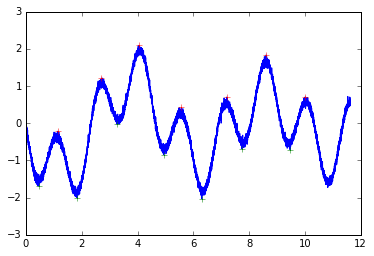

test_peak_ACV1 (__main__.Test_peakdetect) ... ok
test_peak_ACV2 (__main__.Test_peakdetect) ... ok
test_peak_ACV3 (__main__.Test_peakdetect) ... ok
test_peak_ACV4 (__main__.Test_peakdetect) ... ok
test_peak_ACV5 (__main__.Test_peakdetect) ... ok
test_peak_ACV6 (__main__.Test_peakdetect) ... ok
test_peak_ACV1 (__main__.Test_peakdetect_parabola) ... ok
test_peak_ACV2 (__main__.Test_peakdetect_parabola) ... ok
test_peak_ACV3 (__main__.Test_peakdetect_parabola) ... ok
test_peak_ACV4 (__main__.Test_peakdetect_parabola) ... ok
test_peak_ACV5 (__main__.Test_peakdetect_parabola) ... ok
test_peak_ACV6 (__main__.Test_peakdetect_parabola) ... ok
test_peak_ACV1 (__main__.Test_peakdetect_fft) ... ok
test_peak_ACV2 (__main__.Test_peakdetect_fft) ... ok
test_peak_ACV3 (__main__.Test_peakdetect_fft) ... ok
test_peak_ACV4 (__main__.Test_peakdetect_fft) ... ok
test_peak_ACV5 (__main__.Test_peakdetect_fft) ... ok
test_peak_ACV6 (__main__.Test_peakdetect_fft) ... ok
test_peak_ACV1 (__main__.Test_peakdetect

In [89]:
import pandas as pd
import numpy as np
%run peakdetect.py
%run analytic_wfm.py
%run test.py
from peakdetect import peakdetect
%matplotlib inline
import matplotlib.pyplot as plt

In [90]:
columns=['date', 'RHR']
rhr=pd.read_csv("C:\\Users\\Karen\\FitBit Data\\RestingHeartRateManual.csv", sep=",", names=columns)
rhr=rhr.dropna(subset=['RHR'])
rhr.head()

,date,RHR
0,1/30/2015,80.0
1,1/31/2015,87.0
2,2/1/2015,89.0
3,2/2/2015,86.0
4,2/3/2015,83.0


In [91]:
ovu=pd.read_csv("C:\\Users\\Karen\\OvuView\\ovuview-data_upto_August9_2016.csv", sep=",")
ovu.rename(columns={ovu.columns[1]:"temperature"}, inplace=True)
ovu.rename(columns={ovu.columns[0]:"date"}, inplace=True)
ovu.rename(columns={ovu.columns[2]:"discard"}, inplace=True)
ovu.drop(ovu.columns[[3]], axis=1, inplace=True)
ovu.drop(ovu.columns[[3]], axis=1, inplace=True)
ovu.drop(ovu.columns[[3]], axis=1, inplace=True)
ovu.drop(ovu.columns[[3]], axis=1, inplace=True)
ovu.rename(columns={ovu.columns[3]:"period"}, inplace=True)
ovu.drop(ovu.columns[4:], axis=1, inplace=True)
ovu=ovu.dropna(subset=['temperature'])
ovu.head()

,date,temperature,discard,period
27,2012-03-29,97.5,N,LIGHT
28,2012-03-30,97.5,N,LIGHT
29,2012-03-31,97.3,N,LIGHT
30,2012-04-01,97.3,N,NONE
31,2012-04-02,97.1,N,NONE


In [92]:
ovu=ovu[ovu.discard !='Y']

In [93]:
ovu['date']=pd.to_datetime(ovu['date'])
ovu['date_int']=ovu.date.astype(np.int64)
rhr['date']=pd.to_datetime(rhr['date'])
rhr['date_int']=rhr.date.astype(np.int64)

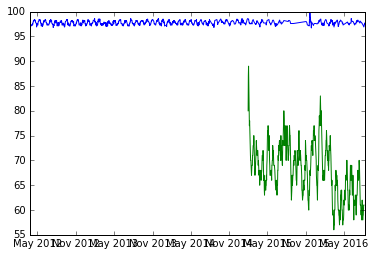

In [94]:
plt.plot(ovu['date'], ovu['temperature'])
plt.plot(rhr['date'], rhr['RHR'])
plt.show()

In [95]:
results=pd.merge(ovu, rhr, how='inner', on='date_int')
results.head()

,date_x,temperature,discard,period,date_int,date_y,RHR
0,2015-01-31,98.5,N,NaN,1422662400000000000,2015-01-31,87.0
1,2015-02-01,98.5,N,NaN,1422748800000000000,2015-02-01,89.0
2,2015-02-04,97.7,N,HEAVY,1423008000000000000,2015-02-04,80.0
3,2015-02-05,97.7,N,HEAVY,1423094400000000000,2015-02-05,77.0
4,2015-02-06,97.6,N,MEDIUM,1423180800000000000,2015-02-06,78.0


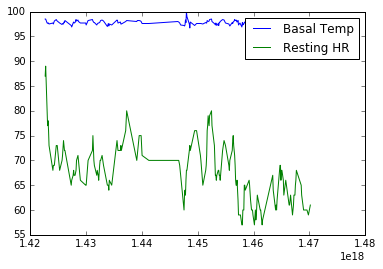

In [96]:
plt.plot(results['date_int'], results['temperature'])
plt.plot(results['date_int'], results['RHR'])
plt.legend(['Basal Temp', 'Resting HR'])
plt.show()

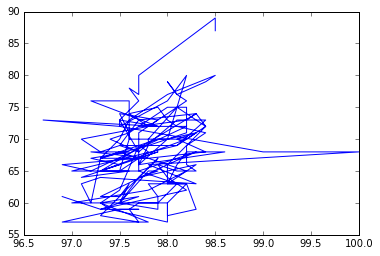

In [97]:
plt.plot(results['temperature'], results['RHR'])
plt.show()

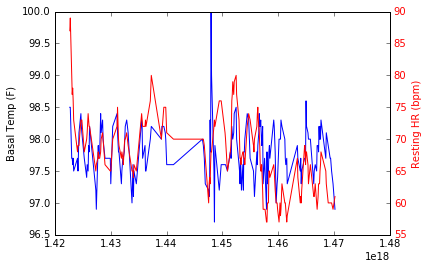

In [98]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(results['date_int'], results['temperature'])
ax1.set_ylabel('Basal Temp (F)')

ax2=ax1.twinx()
ax2.plot(results['date_int'], results['RHR'],'r-')
ax2.set_ylabel('Resting HR (bpm)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [99]:
results['RHR'].corr(results['temperature'])

0.32543349181794434

In [100]:
results['RHR_scaled']=0.1*results['RHR']+91

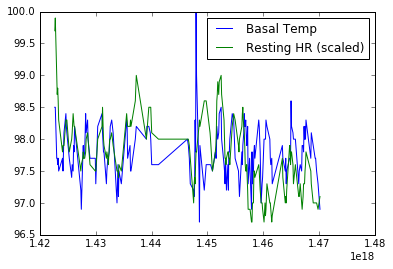

In [101]:
plt.plot(results['date_int'], results['temperature'])
plt.plot(results['date_int'], results['RHR_scaled'])
plt.legend(['Basal Temp', 'Resting HR (scaled)'])
plt.show()

In [102]:
results['RHR_scaled'].corr(results['temperature'])

0.32543349181794323

In [103]:
results['Diff']=results['RHR_scaled']-results['temperature']

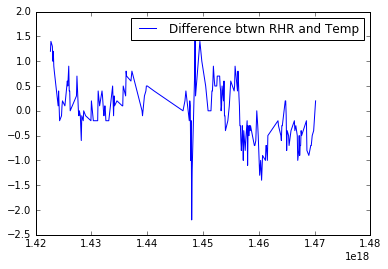

In [104]:
plt.plot(results['date_int'], results['Diff'])
plt.legend(['Difference btwn RHR and Temp'])
plt.show()

In [105]:
RHRList=results['RHR'].tolist()
TempList=results['temperature'].tolist()
DateList=results['date_int'].tolist()

In [167]:
RHRmaxes, RHRmins =peakdetect(y_axis=RHRList, x_axis=DateList, lookahead=2)
Tempmaxes, Tempmins= peakdetect(y_axis=TempList, x_axis=DateList, lookahead=2)

In [168]:
xmaxRHR=[x[0] for x in RHRmaxes]
ymaxRHR=[x[1] for x in RHRmaxes]
xmaxTemp=[x[0] for x in Tempmaxes]
ymaxTemp=[x[1] for x in Tempmaxes]

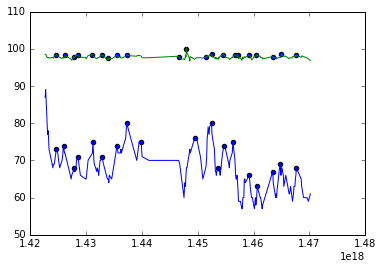

In [169]:
plt.scatter(xmaxRHR, ymaxRHR)
plt.scatter(xmaxTemp, ymaxTemp)
plt.plot(results['date_int'], results['RHR'])
plt.plot(results['date_int'], results['temperature'])
plt.show()

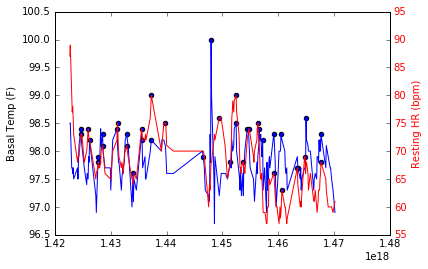

In [176]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(results['date_int'], results['temperature'])
ax1.set_ylabel('Basal Temp (F)')
ax1.scatter(xmaxTemp, ymaxTemp)

ax2=ax1.twinx()
ax2.plot(results['date_int'], results['RHR'],'r-')
ax2.set_ylabel('Resting HR (bpm)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.scatter(xmaxRHR, ymaxRHR)
plt.show()

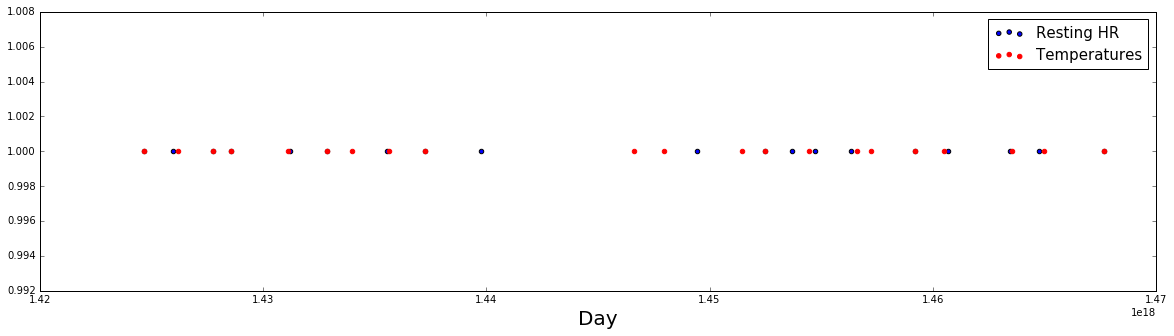

In [205]:
fig=plt.figure(figsize=(20,5))
plt.scatter(xmaxRHR, [1]*len(xmaxRHR), label='Resting HR')
plt.scatter(xmaxTemp, [1]*len(xmaxTemp), color='r', label='Temperatures')
plt.legend(fontsize=15)
ax=fig.add_subplot(111)
ax.set_xlabel('Day', fontsize=20)
plt.show()

In [196]:
RHRSeries=pd.DataFrame(RHRmaxes)
TempSeries=pd.DataFrame(Tempmaxes)
RHRSeries[0].corr(TempSeries[0])

0.99854690550595582

$\gamma$ esc then m  for typing latex stuff!